## Importing Data

In [1]:
import pandas as pd

Customize dataframe display:

In [2]:
#pd.set_option('display.max_rows', 1000)
#pd.set_option('display.max_columns', 15)
#pd.set_option('display.width', 1000)

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import seaborn as sns

In [6]:
df = pd.read_csv('/Users/asamra/dev/Project2_Titanic/titanic/train.csv')

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


df.shape shows rows and columns in tuple:

In [9]:
df.shape

(891, 12)

## Cleaning Data

df.isnull().sum() counts the number of nulls in each column: 

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**687 observations in the Cabin column are missing and the Ticket column doesn't provide any information on socio-economic status. So, I've decided to drop both columns.**

df.drop(['column5'], axis = 1) removes the 5th column where axis refers to column (row would be axis = 0) 0 & 1 refer to the df.shape tuple: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [11]:
df = df.drop(['Ticket','Cabin'], axis = 1)

Note how we only see 10 columns now instead of the original 12:

In [12]:
df.shape

(891, 10)

df.dropna() drops rows where at least 1 is missing: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

Below, note how we now have 712 rows, down from 891:

In [13]:
df = df.dropna()

In [14]:
df.shape

(712, 10)

## Final Data Frame

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


## Summary Statistics

Summary statistics for all columns:

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Summary statistics for single column:

In [17]:
pd.DataFrame(df.Age.describe())

,Age
count,712.000000
mean,29.642093
std,14.492933
min,0.420000
25%,20.000000
50%,28.000000
75%,38.000000
max,80.000000


Why doesn't the following show the same info as the Pandas Intro file?:http://localhost:8890/notebooks/dev/DE-Pandas-Intro-nb/Python%20Pandas%20Tutorial%20A%20Complete%20Introduction%20for%20Beginners/notebook.ipynb

In [18]:
df['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

df.corr() shows correlation for all columns:

Note, this only makes sense for continuous variables. The correlation between Pclass and Age means nothing in this form since Pclass is a categorical variable.

In [19]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


## Analysis: Segmentation via value_counts

df['column'].value_counts() gives us a frequency of all values in a column:

In [20]:
df['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [21]:
df['Survived'].value_counts(normalize=True)

0    0.595506
1    0.404494
Name: Survived, dtype: float64

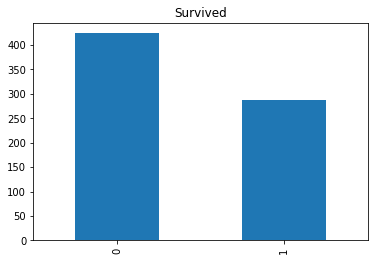

In [22]:
df['Survived'].value_counts().plot(kind='bar', title = 'Survived')

In [23]:
df['Pclass'].value_counts()

3    355
1    184
2    173
Name: Pclass, dtype: int64

In [24]:
df['Pclass'].value_counts(normalize=True) * 100

3    49.859551
1    25.842697
2    24.297753
Name: Pclass, dtype: float64

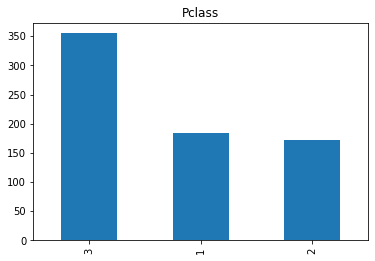

In [25]:
df['Pclass'].value_counts().plot(kind='bar', title = 'Pclass')

In [26]:
df['Sex'].value_counts()

male      453
female    259
Name: Sex, dtype: int64

In [27]:
df['Sex'].value_counts(normalize=True) * 100

male      63.623596
female    36.376404
Name: Sex, dtype: float64

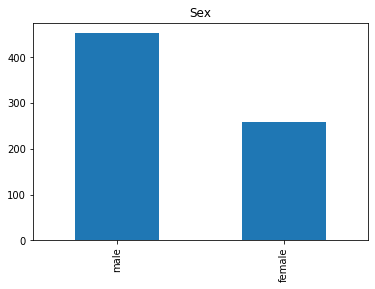

In [28]:
df['Sex'].value_counts().plot(kind='bar', title = 'Sex')

In [29]:
df['Embarked'].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [30]:
df['Embarked'].value_counts(normalize=True)*100

S    77.808989
C    18.258427
Q     3.932584
Name: Embarked, dtype: float64

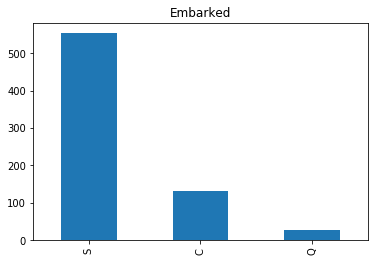

In [31]:
df['Embarked'].value_counts().plot(kind='bar', title = 'Embarked')

## Analysis: Survival and Passenger Class

In [32]:
survived_pclass = df[['Survived','Pclass']]

In [33]:
survived_pclass

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
885,0,3
886,0,2
887,1,1
889,1,1


In [34]:
survived_pclass.shape

(712, 2)

In [35]:
survived_pclass.groupby(['Survived','Pclass']).size()

Survived  Pclass
0         1          64
          2          90
          3         270
1         1         120
          2          83
          3          85
dtype: int64

## Analysis: Survival and Gender

In [36]:
survived_sex = df[['Survived','Sex']]

In [37]:
survived_sex

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
885,0,female
886,0,male
887,1,female
889,1,male


In [38]:
survived_sex.groupby(['Survived','Sex']).size()

Survived  Sex   
0         female     64
          male      360
1         female    195
          male       93
dtype: int64

In [39]:
df_fem = df.Sex.str.match('female')

In [40]:
df_fem = df[df_fem]

In [41]:
survived_fem = df_fem[['Survived','Sex']]

In [42]:
survived_fem

,Survived,Sex
1,1,female
2,1,female
3,1,female
8,1,female
9,1,female
...,...,...
879,1,female
880,1,female
882,0,female
885,0,female


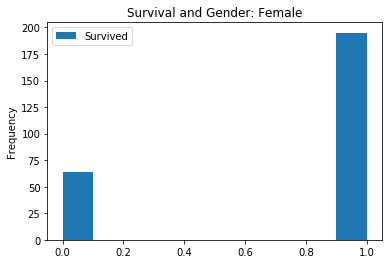

In [43]:
survived_fem.plot(kind='hist', title='Survival and Gender: Female')

In [44]:
df_male = df.Sex.str.match('male')

In [45]:
df_male = df[df_male]

In [46]:
survived_male = df_male[['Survived','Sex']]

In [47]:
survived_male

,Survived,Sex
0,0,male
4,0,male
6,0,male
7,0,male
12,0,male
...,...,...
883,0,male
884,0,male
886,0,male
889,1,male


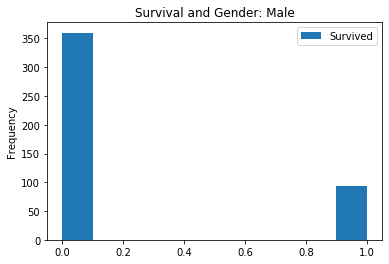

In [48]:
survived_male.plot(kind='hist', title='Survival and Gender: Male')